In [2]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/WINTER2020/SimpleCPUtest'

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [4]:
import matplotlib

In [54]:
Configuration_names = ['run_allbenchmarks','run_contrlbenchmarks','run_memorybenchmarks','run_micro']

zm_config= 'run_micro'

all_arch = ['X86','ARM-32','RISCV']
zm_arch = ['RISCV','ARM-32','X86']


all_memory_models = ['Slow', 'SingleCycle', 'Inf', 'Slow']
zm_memory_models = ['SingleCycle']

all_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP',
                    ]
execution_benchmarks= ['EI','EF','ED1','EM1','EM5']

all_gem5_cpus = ['Simple','DefaultO3','Minor']
zm_gem5_cpus = ['Simple']#'DefaultO3']



In [55]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
       # print(r[start:end])
        return float(r[start:end])
    



### Dataframe : Execution Benchmarks run on single cycle memroy latency for all ISA's

In [105]:
rows = []

for arch in zm_arch:
    for mem in zm_memory_models:
        for bm in execution_benchmarks :   
            for sys in zm_gem5_cpus:
                rows.append([arch,mem,bm, sys,
                                 gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys, 'sim_ticks')/1000, #1000
                                 gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys, 'sim_insts'),
                                 gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys, 'sim_ops'),
                                 gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys, 'sim_ticks'),
                                 gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys, 'host_op_rate'),
                                 gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys, 'system.cpu.num_mem_refs'),
                                ])
            
vrg_df = pd.DataFrame(rows, columns=['arch','mem','benchmark','cpu',
                                      'cycles', 
                                     'instructions', 
                                     'ops',
                                     'time','host_op_rate','mem_refs'
                                      ])

vrg_df['ipc'] = vrg_df['instructions']/vrg_df['cycles']
vrg_df['cpi']= 1/vrg_df['ipc']
vrg_df['percent_of_memrefs'] = vrg_df['mem_refs']/vrg_df['instructions']
vrg_df['percent_of_other'] = 1 - vrg_df['percent_of_memrefs']
vrg_df['expected_IPC']= 1/vrg_df['percent_of_other']+ (vrg_df['percent_of_memrefs']*2)

print(vrg_df)

      arch          mem benchmark     cpu        cycles  instructions  \
0    RISCV  SingleCycle        EI  Simple  40353.000000       35021.0   
1    RISCV  SingleCycle        EF  Simple  44622.000000       43215.0   
2    RISCV  SingleCycle       ED1  Simple   3624.000000        2240.0   
3    RISCV  SingleCycle       EM1  Simple  36379.000000       18617.0   
4    RISCV  SingleCycle       EM5  Simple  69010.000000       35010.0   
5   ARM-32  SingleCycle        EI  Simple  50052.000000       46260.0   
6   ARM-32  SingleCycle        EF  Simple      7.820946      737813.0   
7   ARM-32  SingleCycle       ED1  Simple  13151.000000        9357.0   
8   ARM-32  SingleCycle       EM1  Simple  37703.000000       33915.0   
9   ARM-32  SingleCycle       EM5  Simple  45908.000000       42118.0   
10     X86  SingleCycle        EI  Simple  25094.000000       16449.0   
11     X86  SingleCycle        EF  Simple  68041.000000       47108.0   
12     X86  SingleCycle       ED1  Simple  35215.00

In [71]:
#plotting all Benchmark
def doplot_benchmarks(benchmarks,benchmark_names,cpus,stat,mem,arch,norm=False):
    plt.figure()
    i = 0
    for bm in benchmarks:
        if norm:
            base = vrg_df[stat].iloc[0]
        else:
            base = 1
        for j,sys in enumerate(cpus):
            d = vrg_df[(vrg_df['cpu']==sys) & (vrg_df['benchmark']==bm) & (vrg_df['mem']==mem) 
                       & (vrg_df['arch']==arch)]
            plt.bar(i, d[stat]/base, color='C'+str(j))
            i += 1
        i += 1
        
    
    for i,sys in enumerate(cpus):
        plt.bar(0,0,color='C'+str(i), label=sys)
    new_names = benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names))*(len(cpus)+1)+i/2, benchmark_names, rotation=40, ha='right')

## IPC for SingleCycle Memory : ISA RISCV

<IPython.core.display.Javascript object>


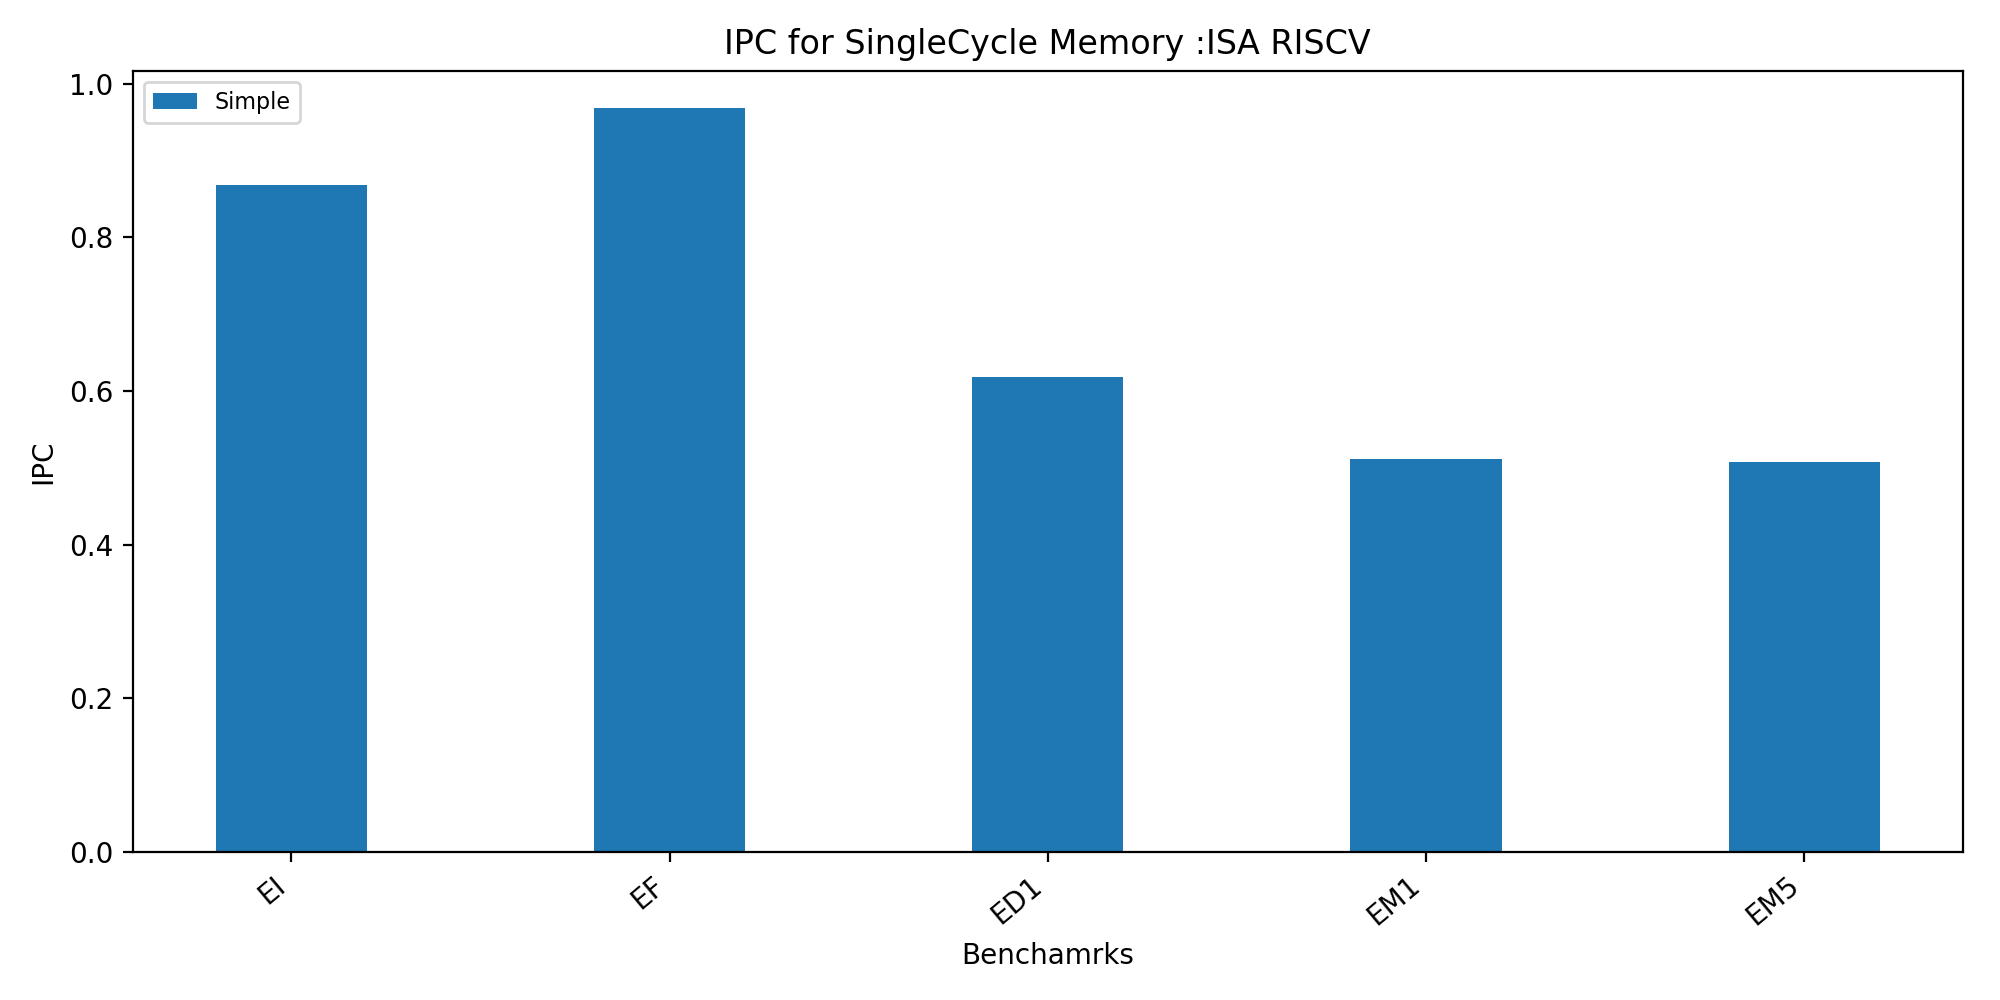

    arch          mem benchmark     cpu   cycles  instructions      ops  \
0  RISCV  SingleCycle        EI  Simple  40353.0       35021.0  35021.0   

         time  host_op_rate  mem_refs       ipc       cpi  
0  40353000.0     1049439.0     876.0  0.867866  1.152252  
    arch          mem benchmark     cpu   cycles  instructions      ops  \
1  RISCV  SingleCycle        EF  Simple  44622.0       43215.0  43215.0   

         time  host_op_rate  mem_refs       ipc       cpi  
1  44622000.0     1231322.0     892.0  0.968468  1.032558  
    arch          mem benchmark     cpu  cycles  instructions     ops  \
2  RISCV  SingleCycle       ED1  Simple  3624.0        2240.0  2240.0   

        time  host_op_rate  mem_refs       ipc       cpi  
2  3624000.0      260693.0     876.0  0.618102  1.617857  
    arch          mem benchmark     cpu   cycles  instructions      ops  \
3  RISCV  SingleCycle       EM1  Simple  36379.0       18617.0  18617.0   

         time  host_op_rate  mem_refs     

In [72]:
#plotting IPC for SingleCycle bandwidth for Timingsimple RISCV
benchmarks = execution_benchmarks
benchmark_names =  execution_benchmarks
cpus = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpus,'ipc','SingleCycle','RISCV',norm=False)
plt.ylabel('IPC')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC for SingleCycle Memory :ISA RISCV')
plt.tight_layout()
plt.savefig('IPC_execbenchmarks_SingleCycle_simple_RISCV.png', format='png', dpi=600)

## IPC for SingleCycle Memory : ISA ARM

<IPython.core.display.Javascript object>


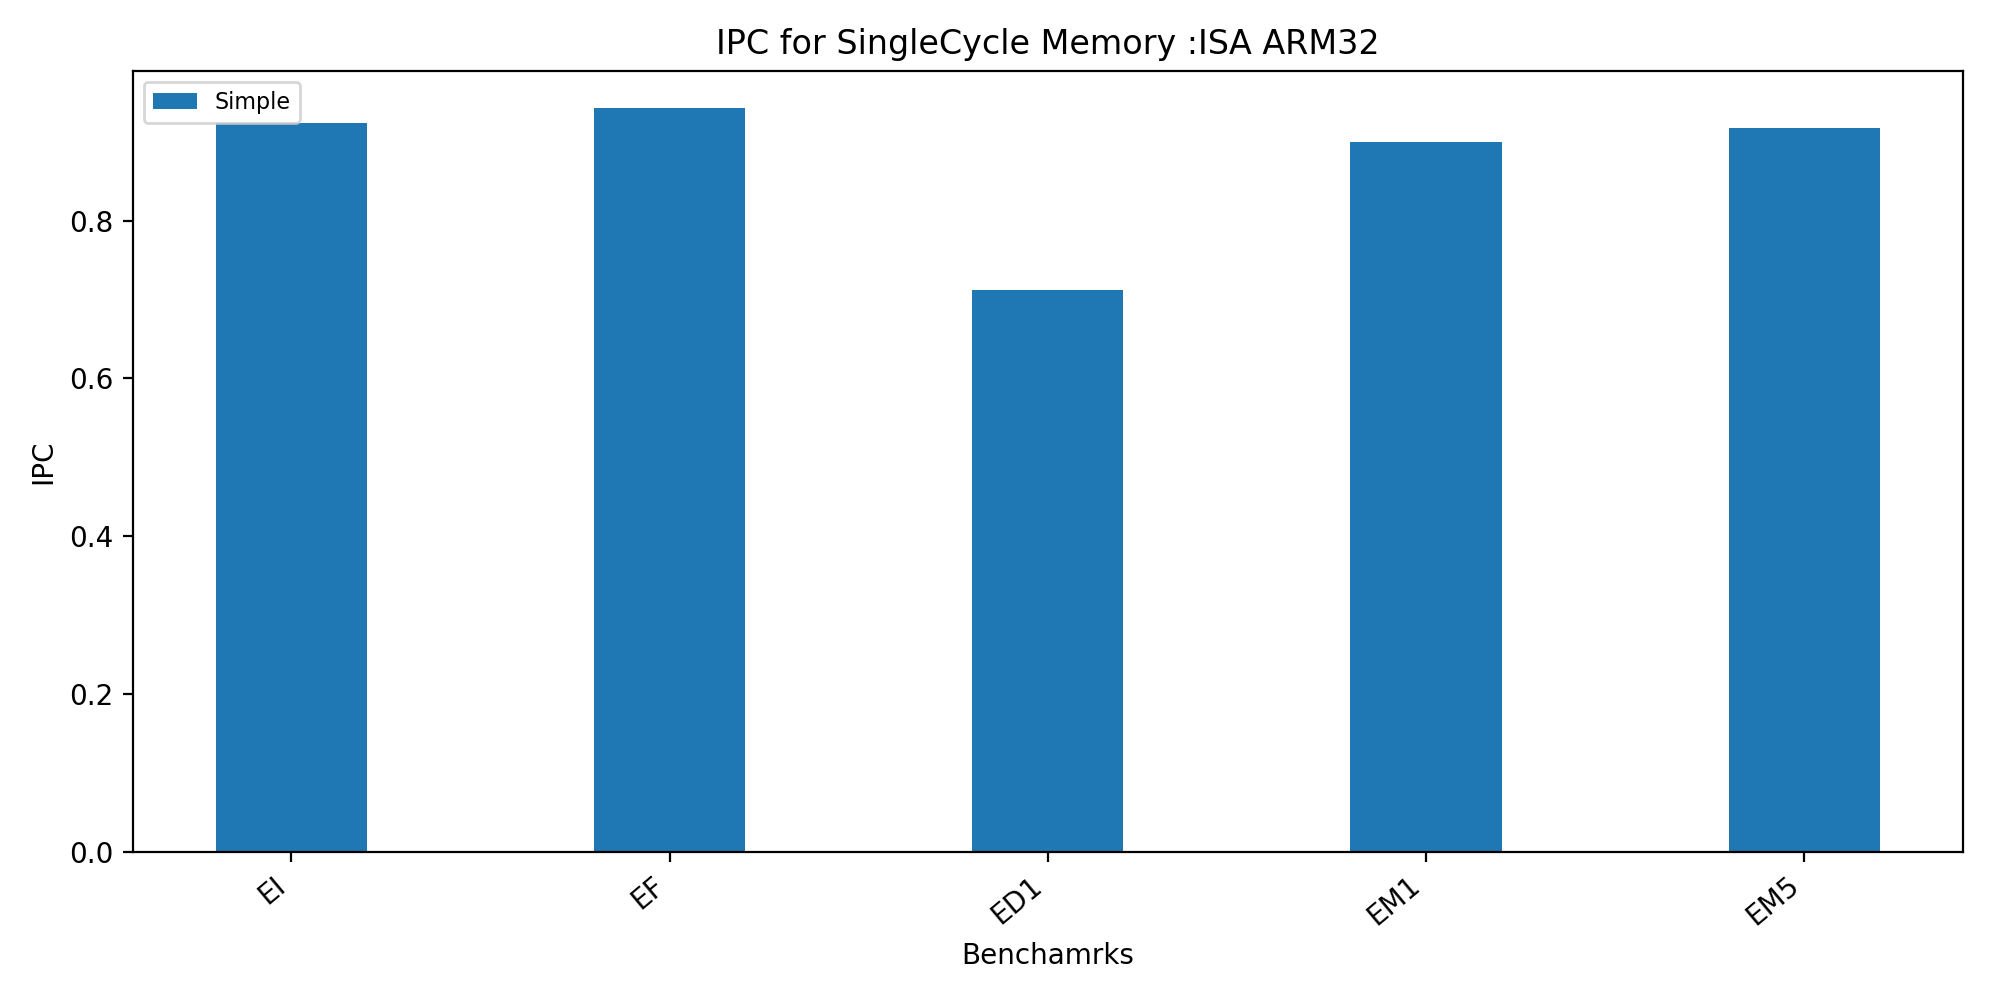

In [13]:
#plotting IPC for SingleCycle bandwidth for Timingsimple ARM-32
benchmarks = execution_benchmarks
benchmark_names =  execution_benchmarks
cpus = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpus,'ipc','SingleCycle','ARM-32',norm=False)
plt.ylabel('IPC')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC for SingleCycle Memory :ISA ARM32')
plt.tight_layout()
plt.savefig('IPC_execbenchmarks_SingleCycle_simple_ARM.png', format='png', dpi=600)

## IPC for SingleCycle Memory : ISA X86

<IPython.core.display.Javascript object>


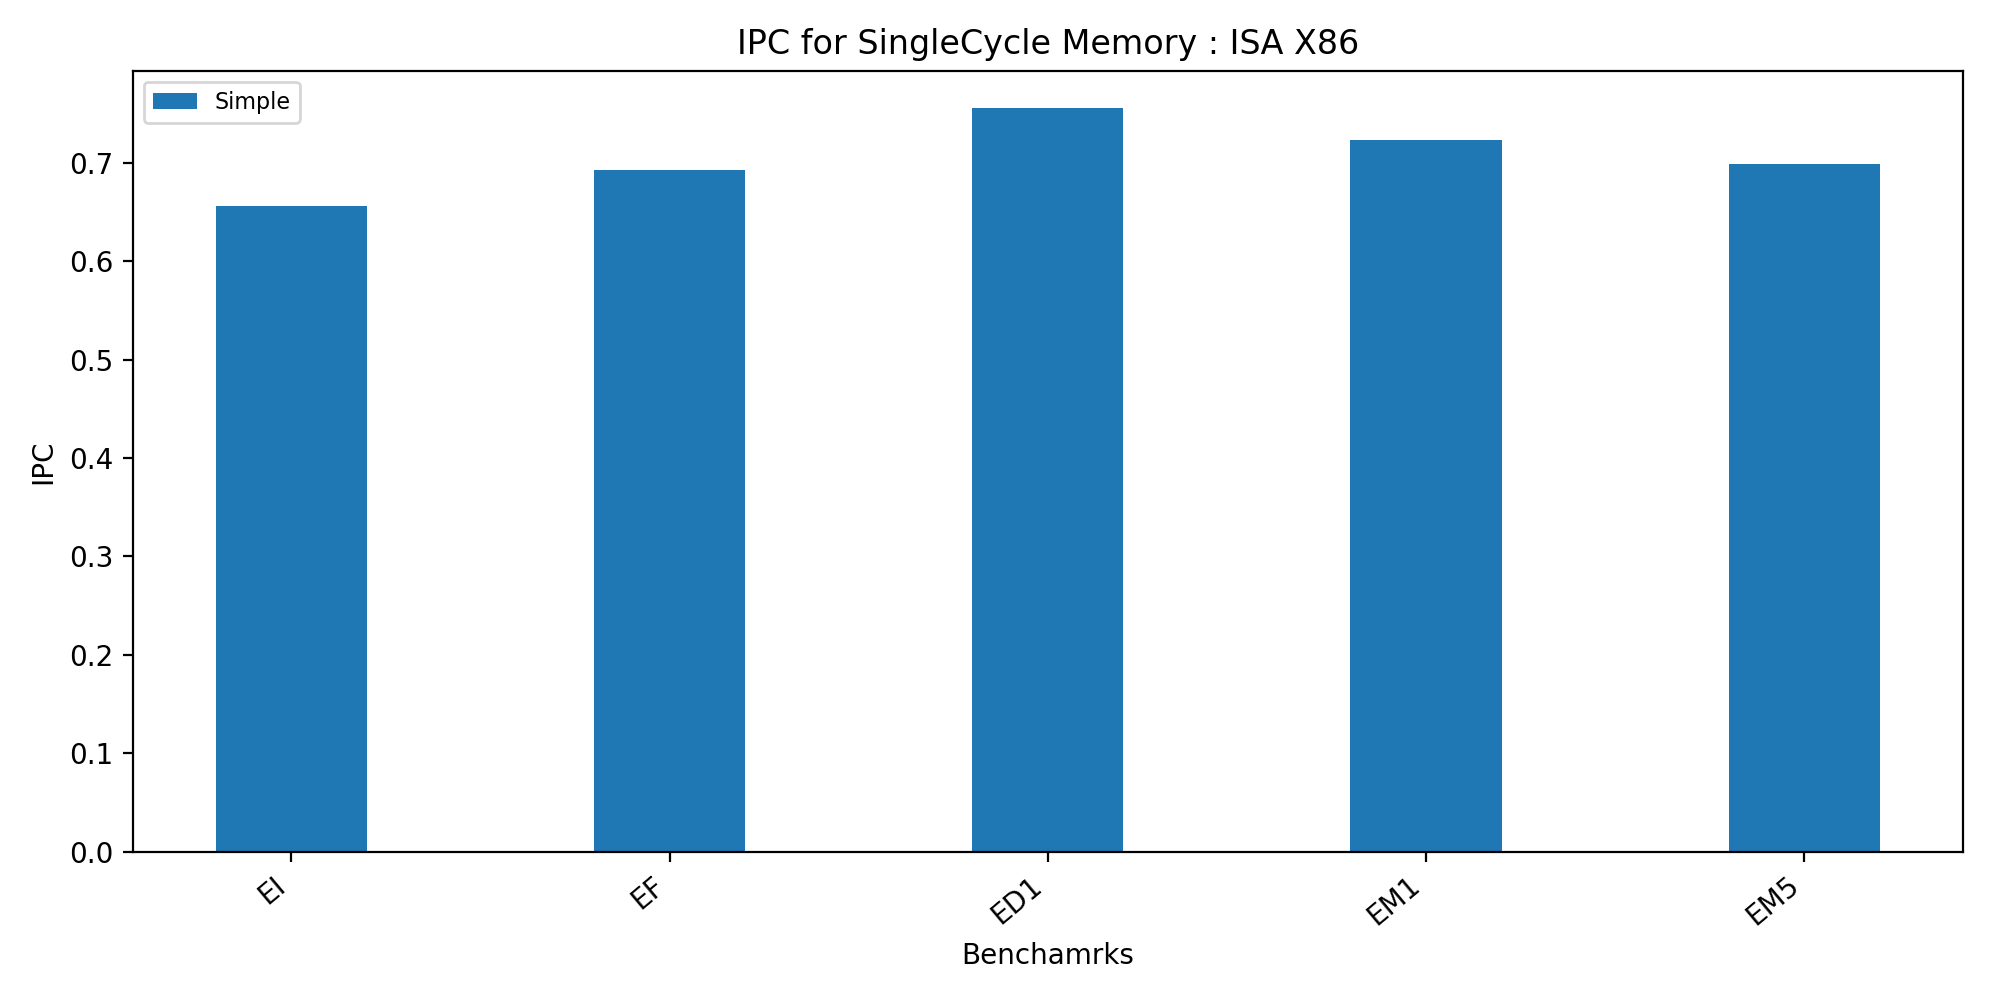

In [57]:
#plotting IPC for SingleCycle bandwidth for Timingsimple X86
benchmarks = execution_benchmarks
benchmark_names =  execution_benchmarks
cpus = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpus,'ipc','SingleCycle','X86',norm=False)
plt.ylabel('IPC')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC for SingleCycle Memory : ISA X86')
plt.tight_layout()
plt.savefig('IPC_execbenchmarks_SingleCycle_simple_X86.png', format='png', dpi=600)


In [54]:
#ERROR RATE GRAPH
#comparision between instruction mix and IPC.
benchmarks = execution_benchmarks
benchmark_names =  all_benchmarks_names
cpus = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_graphs(benchmarks,benchmarks_names,cpus)
plt.ylabel('IPC')
plt.xlabel('% of mem inst')
plt.legend(loc=2, prop={'size': 8})
plt.title('IPC vs mem instructions ')
plt.tight_layout()
plt.savefig('IPC_vs_mem_inst.png', format='png', dpi=600)



NameError: name 'doplot_graphs' is not defined